<a href="https://colab.research.google.com/github/Pengchengzhi/Face-Alignment-DRF/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import os
path="/content/drive/My Drive/Face Alignment DRF"
os.chdir(path)
#os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
#import torch
#import torch.nn as nn
#from collections import OrderedDict
#import imageio
import matplotlib.pyplot as plt
import argparse, os, sys
import cv2
from PIL import Image
import json
import pandas as pd


#dataset_afw_path="datasets/afw"
dataset_helen_train_path="datasets/helen/trainset"
dataset_helen_test_path="datasets/helen/testset"

# Load Annotations from original dataset

In [3]:
# https://github.com/musyoku/face-alignment-at-3000fps/blob/master/run/train.py

# def load_annotations(directory):
#   annotations = {}
#   fs = os.listdir(directory)
#   number = 0
#   for filename in fs:
#     if filename.endswith(".pts"):
#       with open(os.path.join(directory, filename), "r") as f:
#         annotation = f.read().strip().split("\n")
# 				#assert len(annotation) == 72
#         landmarks = []
#         for location_str in annotation[3:-1]:
#           location = location_str.split(" ")
#           landmarks.append((float(location[0]), float(location[1])))
#         annotations[filename.replace(".pts", "")] = landmarks
#       number += 1
#       if number % 100 == 0:
#         print('Processing... ',number,'/',int(len(fs)/2))
#   return annotations

In [4]:
# Load annotations form .pts file

# annotations_helen_train = load_annotations(dataset_helen_train_path)
# annotations_helen_test = load_annotations(dataset_helen_test_path)

In [5]:
# Save work in js format

# helen_train_js = json.dumps(annotations_helen_train)  
# helen_test_js = json.dumps(annotations_helen_test)  
# fileObject = open('helen_train_pts.json', 'w')  
# fileObject.write(helen_train_js)  
# fileObject.close()
# fileObject = open('helen_test_pts.json', 'w')  
# fileObject.write(helen_test_js)  
# fileObject.close() 

In [3]:
with open("helen_train_pts.json",'r') as htrain:
  htrain_pts = json.load(htrain)
with open("helen_test_pts.json",'r') as htest:
  htest_pts = json.load(htest)

# Crop img

In [4]:
def boundary(pt):
  max_x = max_y = 0
  min_x = min_y = 1e5
  for ind in range(len(pt)):
    max_x = max(max_x,pt[ind][0])
    max_y = max(max_y,pt[ind][1])
    min_x = min(min_x,pt[ind][0])
    min_y = min(min_y,pt[ind][1])
  return max_x, min_x, max_y, min_y

# Crop train set

In [6]:
helen_cropped_train_pts = {}
number = 0

for key in htrain_pts.keys():
  max_x, min_x, max_y, min_y = boundary(htrain_pts[key])
  img_array = cv2.imread(os.path.join(dataset_helen_train_path, key + '.jpg'))

  xrange = max_x - min_x
  yrange = max_y - min_y
  crop_max_x = int(max_x+0.05*xrange) if max_x+0.05*xrange<img_array.shape[0] else img_array.shape[0]
  crop_max_y = int(max_y+0.05*yrange) if max_y+0.05*yrange<img_array.shape[1] else img_array.shape[1]
  crop_min_x = int(min_x-0.05*xrange) if min_x-0.05*xrange>0 else 0
  crop_min_y = int(min_y-0.05*yrange) if min_y-0.05*yrange>0 else 0
  
  frac_x = 224/(crop_max_x - crop_min_x)
  frac_y = 224/(crop_max_y - crop_min_y)

  cropped_img_array = img_array[crop_min_y:crop_max_y, crop_min_x:crop_max_x, :]
  resized_img = cv2.resize(cropped_img_array,(224,224))
  cv2.imwrite(os.path.join("datasets/cropped_helen/trainset", key + '.jpg'), resized_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

  landmarks = htrain_pts[key].copy()
  for i in range(len(landmarks)):
    landmarks[i][0] = (landmarks[i][0] - crop_min_x)*frac_x
    landmarks[i][1] = (landmarks[i][1] - crop_min_y)*frac_y
  helen_cropped_train_pts[key] = landmarks
  number += 1
  if number % 100 == 0:
    print('Processing... ',number,'/',len(htrain_pts))

Processing...  100 / 2000
Processing...  200 / 2000
Processing...  300 / 2000
Processing...  400 / 2000
Processing...  500 / 2000
Processing...  600 / 2000
Processing...  700 / 2000
Processing...  800 / 2000
Processing...  900 / 2000
Processing...  1000 / 2000
Processing...  1100 / 2000
Processing...  1200 / 2000
Processing...  1300 / 2000
Processing...  1400 / 2000
Processing...  1500 / 2000
Processing...  1600 / 2000
Processing...  1700 / 2000
Processing...  1800 / 2000
Processing...  1900 / 2000
Processing...  2000 / 2000


In [7]:
helen_cropped_train_pts_js = json.dumps(helen_cropped_train_pts)

fileObject = open('helen_cropped_train_pts.json', 'w')  
fileObject.write(helen_cropped_train_pts_js)  
fileObject.close()

## Crop test set

In [8]:
helen_cropped_test_pts = {}
number = 0

for key in htest_pts.keys():
  max_x, min_x, max_y, min_y = boundary(htest_pts[key])
  img_array = cv2.imread(os.path.join(dataset_helen_test_path, key + '.jpg'))

  xrange = max_x - min_x
  yrange = max_y - min_y
  crop_max_x = int(max_x+0.05*xrange) if max_x+0.05*xrange<img_array.shape[0] else img_array.shape[0]
  crop_max_y = int(max_y+0.05*yrange) if max_y+0.05*yrange<img_array.shape[1] else img_array.shape[1]
  crop_min_x = int(min_x-0.05*xrange) if min_x-0.05*xrange>0 else 0
  crop_min_y = int(min_y-0.05*yrange) if min_y-0.05*yrange>0 else 0
  
  frac_x = 224/(crop_max_x - crop_min_x)
  frac_y = 224/(crop_max_y - crop_min_y)

  cropped_img_array = img_array[crop_min_y:crop_max_y, crop_min_x:crop_max_x, :]
  resized_img = cv2.resize(cropped_img_array,(224,224))
  cv2.imwrite(os.path.join("datasets/cropped_helen/testset", key + '.jpg'), resized_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

  landmarks = htest_pts[key].copy()
  for i in range(len(landmarks)):
    landmarks[i][0] = (landmarks[i][0] - crop_min_x)*frac_x
    landmarks[i][1] = (landmarks[i][1] - crop_min_y)*frac_y
  helen_cropped_test_pts[key] = landmarks
  number += 1
  if number % 100 == 0:
    print('Processing... ',number,'/',len(htest_pts))

Processing...  100 / 330
Processing...  200 / 330
Processing...  300 / 330


In [9]:
helen_cropped_test_pts_js = json.dumps(helen_cropped_test_pts)

fileObject = open('helen_cropped_test_pts.json', 'w')  
fileObject.write(helen_cropped_test_pts_js)  
fileObject.close()

# Sample cropping result

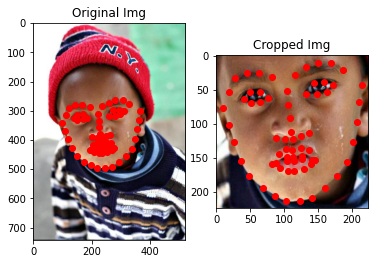

In [10]:
key = '1691766_1'
path_orig_pic = os.path.join("datasets/helen/trainset", key + '.jpg')
path_crop_pic = os.path.join("datasets/cropped_helen/trainset", key + '.jpg')
with open("helen_train_pts.json",'r') as load_train:
  orig_pts = json.load(load_train)
with open("helen_cropped_train_pts.json",'r') as load_crop:
  crop_pts = json.load(load_crop)

orig_pic = cv2.imread(path_orig_pic)
orig_pic = cv2.cvtColor(orig_pic, cv2.COLOR_BGR2RGB)
crop_pic = cv2.imread(path_crop_pic)
crop_pic = cv2.cvtColor(crop_pic, cv2.COLOR_BGR2RGB)

orig_x = [orig_pts[key][i][0] for i in range(68)]
orig_y = [orig_pts[key][i][1] for i in range(68)]
crop_x = [crop_pts[key][i][0] for i in range(68)]
crop_y = [crop_pts[key][i][1] for i in range(68)]

plt.subplot(121) 
plt.imshow(Image.fromarray(orig_pic))
plt.scatter(orig_x,orig_y,color='r')
plt.title('Original Img')
plt.subplot(122) 
plt.imshow(Image.fromarray(crop_pic))
plt.scatter(crop_x,crop_y,color='r')
plt.title('Cropped Img') 
plt.show()